In [76]:
# prdecting the weather

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [78]:
dataset = pd.read_csv("seattle-weather.csv")
# By this we load our dataset

In [79]:
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [80]:
dataset.isnull().sum()
#Checking for missing values

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [81]:
dataset.shape
#Dataset shape

(1461, 6)

In [82]:
dataset.info()
#Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [83]:
dataset.describe()
#Dataset description

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [84]:
dataset["weather"].unique()
#checking the unique value in weather 

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [85]:
dataset.nunique()
#Checking the unique value in dataset

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [86]:
dataset.weather.value_counts()
#checking the value count in weather

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [87]:
dataset["date"]=pd.to_datetime(dataset["date"])
#changing the time to python time

In [88]:
dataset["date"].dt.year
#checking the year according to pyhton time

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
1456    2015
1457    2015
1458    2015
1459    2015
1460    2015
Name: date, Length: 1461, dtype: int64

ANALYSING THE DATA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

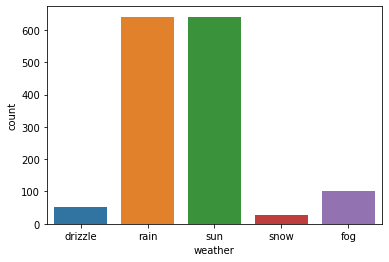

In [89]:
sns.countplot('weather',data=dataset)
dataset['weather'].value_counts()
#Created a count plot for weather

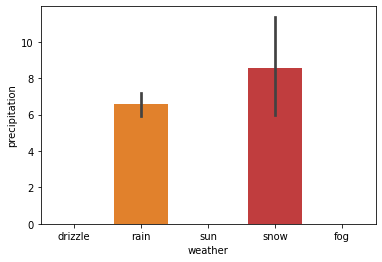

In [90]:
sns.barplot(x='weather',y='precipitation',data=dataset)
# created a barplot for weather and precipitation

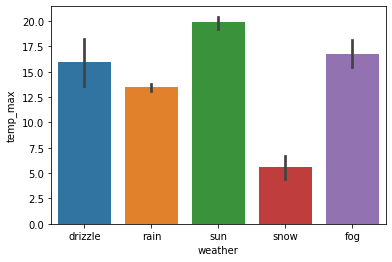

In [91]:
sns.barplot(x='weather',y='temp_max',data=dataset)
# created a barplot for waether and maximum temprature

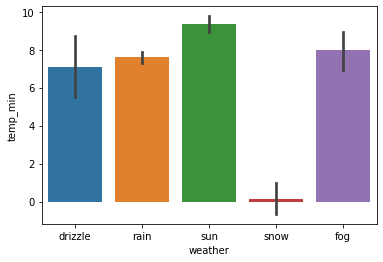

In [92]:
sns.barplot(x='weather',y='temp_min',data=dataset)
# created a bar plot for weather and min temprature

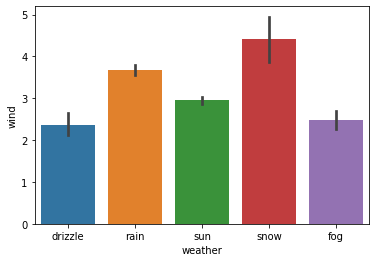

In [93]:
sns.barplot(x='weather',y='wind',data=dataset)
#created a barplot for weather and wind

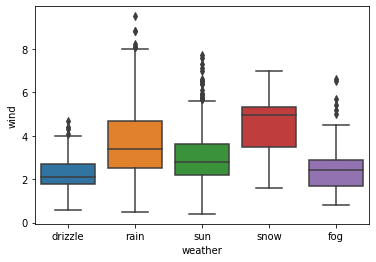

In [94]:
sns.boxplot(x='weather',y='wind',data=dataset)
#created a box plot for weather and wind

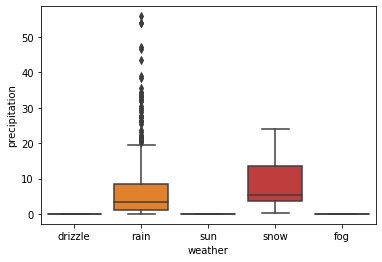

In [95]:
sns.boxplot(x='weather',y='precipitation',data=dataset)
#created a boxplot for weather and precipitation 

In [97]:
dataset.corr()
# checking the relations

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [98]:
dataset.drop('date', axis=1, inplace=True)
# dropping the unwanted coloumns

In [33]:
X = dataset.drop('weather', 1)
y=dataset["weather"]
# setting the value for dependent and independent variables

<ipython-input-33-80829d54c56b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('weather', 1)


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [100]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
 # logistic regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred = lr_model.predict(X_test)
y_pred
#prediction of test set

array(['rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'snow', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain',
       'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 's

In [102]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()
# checking the actual value and the predicted value

,Actual value,Predicted value
68,rain,rain
71,snow,rain
1003,sun,sun
1365,sun,sun
335,rain,rain


EVAULATION OF THE MODEL

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        12
        rain       0.96      0.93      0.95       133
        snow       1.00      0.38      0.55         8
         sun       0.81      1.00      0.89       130

    accuracy                           0.88       293
   macro avg       0.55      0.46      0.48       293
weighted avg       0.82      0.88      0.84       293



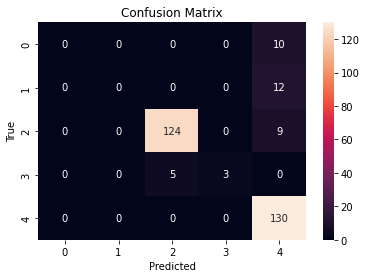

In [38]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [39]:
from sklearn.ensemble import RandomForestClassifier
# import the random forest classifier 

In [40]:
classifierA=RandomForestClassifier(n_estimators= 50, criterion="entropy")

In [103]:
classifierA.fit(X_train, y_train)
y_RF=classifierA.predict(X_test)
# setting the variable in random forest

In [104]:
from sklearn.metrics import accuracy_score
rt_accuracy=accuracy_score (y_RF,y_test)
rt_accuracy
# checking the accuracy for random forest 

0.856655290102389

EVALUTION OF MODEL IN RANDOM FOREST

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.20      0.17      0.18        12
        rain       0.97      0.94      0.95       133
        snow       0.83      0.62      0.71         8
         sun       0.83      0.92      0.87       130

    accuracy                           0.86       293
   macro avg       0.57      0.53      0.54       293
weighted avg       0.84      0.86      0.85       293



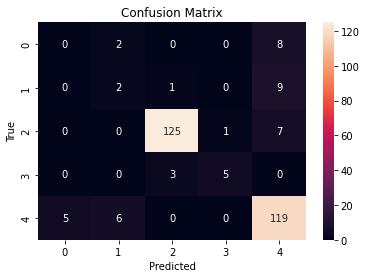

In [105]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_RF)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_RF))

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=2)
# import the decision tree 

In [106]:
classifier.fit(X_train,y_train)
# ftting the model 

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [107]:
y_DT= classifier.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
dt_accuracy=accuracy_score(y_DT,y_test)

In [108]:
dt_accuracy
# checking the accuracy

0.7986348122866894

EVAULTION OF MODEL IN DECISION TREE 

Text(33.0, 0.5, 'True')

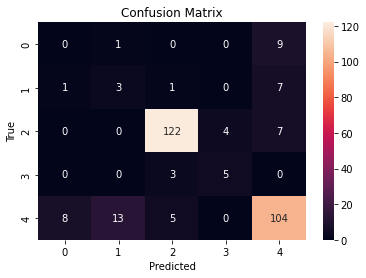

In [109]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_DT)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel ('Predicted')
plt.ylabel('True')

In [110]:
from sklearn.svm import SVC
classifierB=SVC(kernel='linear',random_state=0)
classifierB.fit(X_train,y_train)
#checking for best outcome with Support Vector Classifier

SVC(kernel='linear', random_state=0)

In [51]:
model=classifierB.predict(X_test)
# fitting the model

In [52]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(model,y_test)

In [111]:
svm_accuracy
# checking the accuracy with svm

0.8839590443686007

EVAULTION OF MODEL WITH SUPPORT VECTOR CLASSIFIER

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        12
        rain       0.96      0.93      0.95       133
        snow       1.00      0.38      0.55         8
         sun       0.81      1.00      0.89       130

    accuracy                           0.88       293
   macro avg       0.55      0.46      0.48       293
weighted avg       0.82      0.88      0.84       293



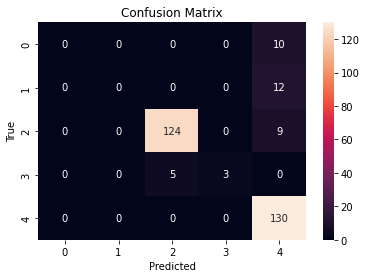

In [58]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel ('Predicted')
plt.ylabel('True')
print(classification_report(y_test,y_pred))

,Actual value,Predicted value
68,rain,rain
71,snow,rain
1003,sun,sun
1365,sun,sun
335,rain,rain
